# Webscraping 
Collecting data directly from any website

# Installing Required packages

In [36]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### Restart and run all cells

In [37]:
import requests
url = "https://www.opindia.com/latest-news/?nocache"
response = requests.get(url)
response

<Response [200]>

### Proceed web scraping only if it shows 200 as response

### Response Codes
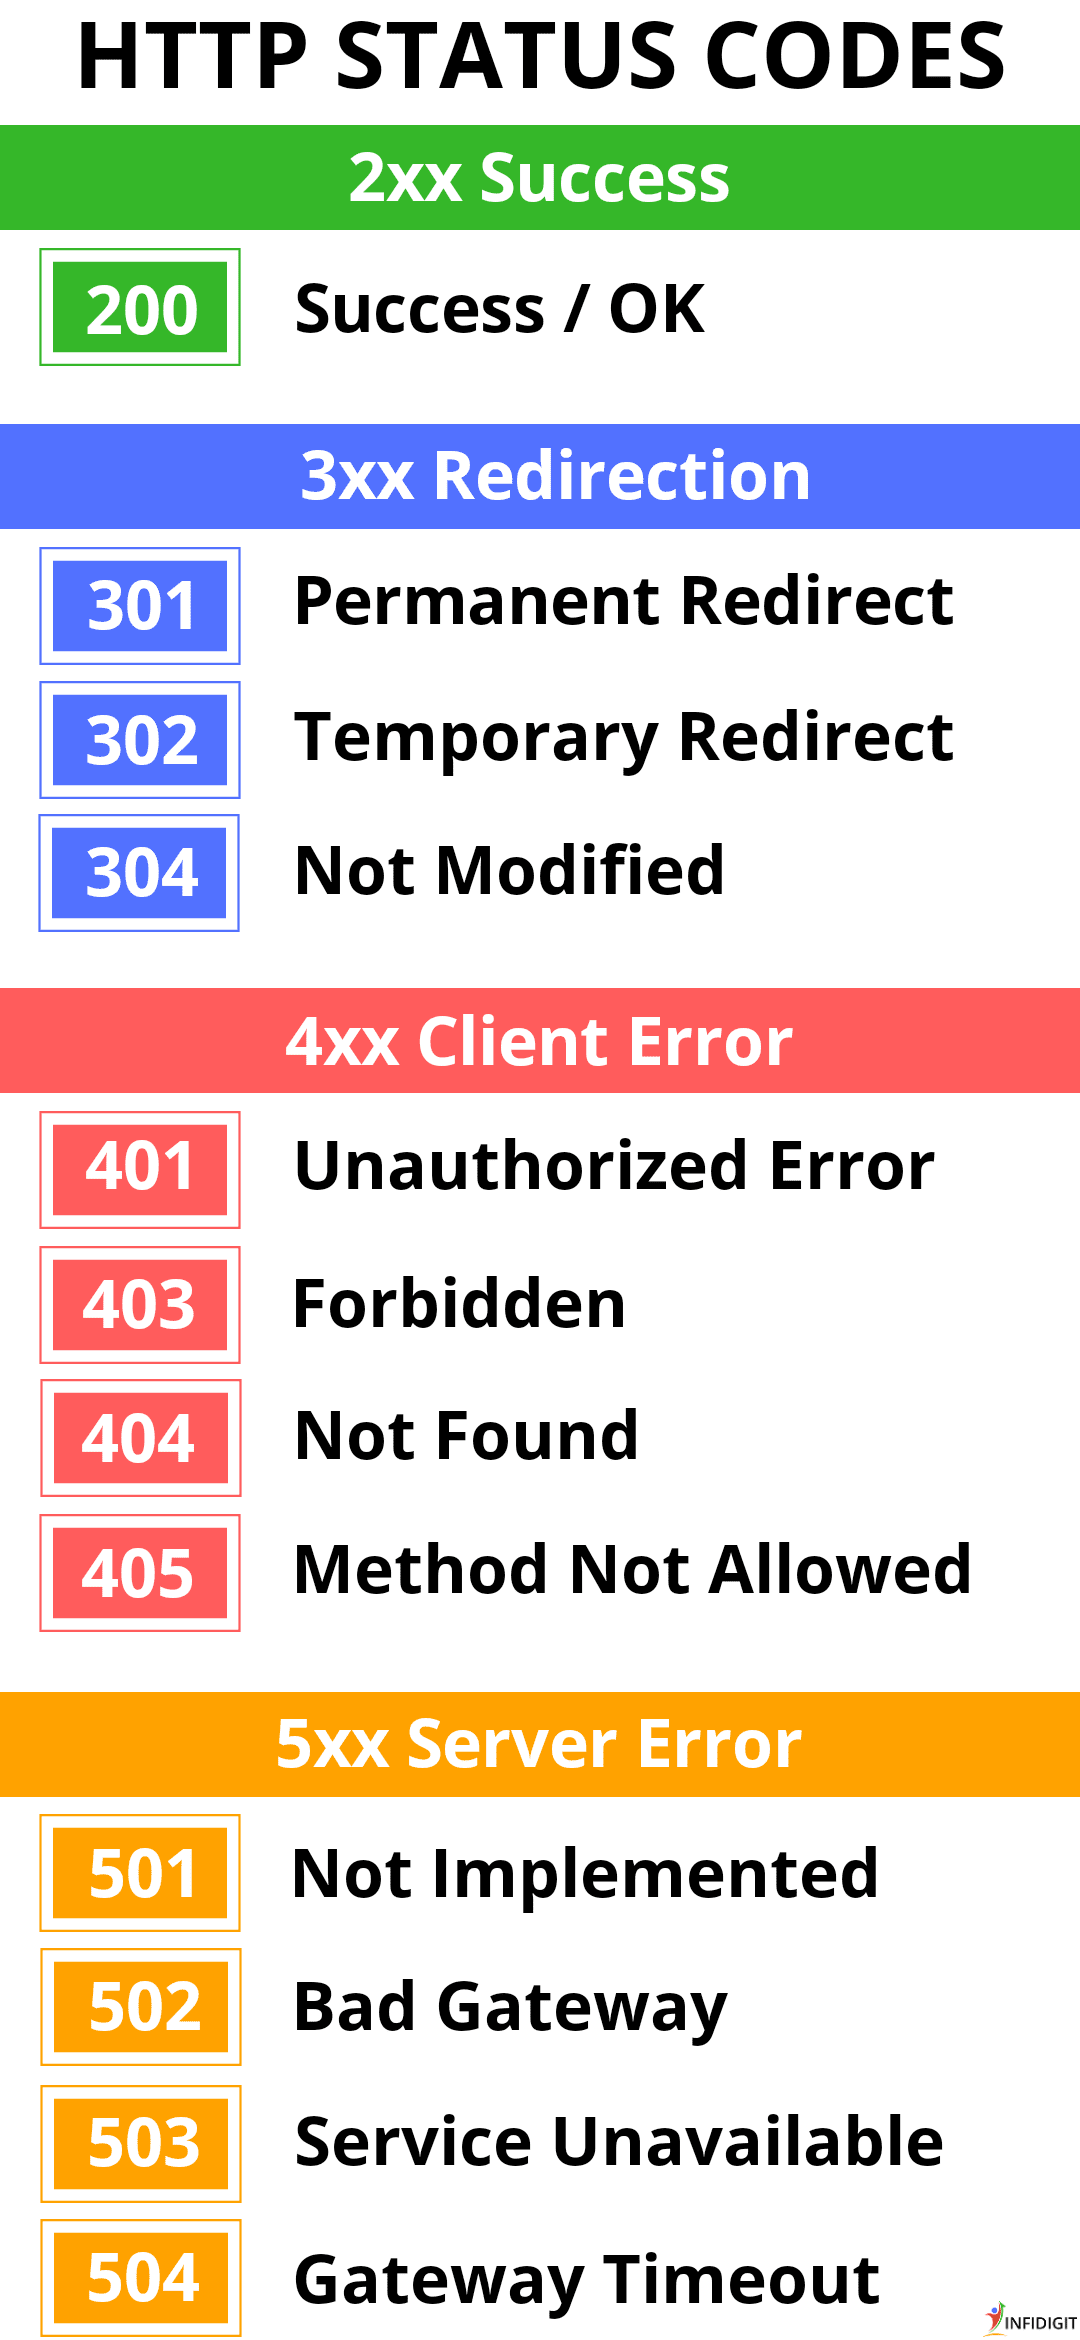

# Heading 1
## Heading 2
### Heading 3
#### Heading 4

<h1> Heading 1 </h1>
<h2> Heading 2 </h2>
<p> Plain text </p>

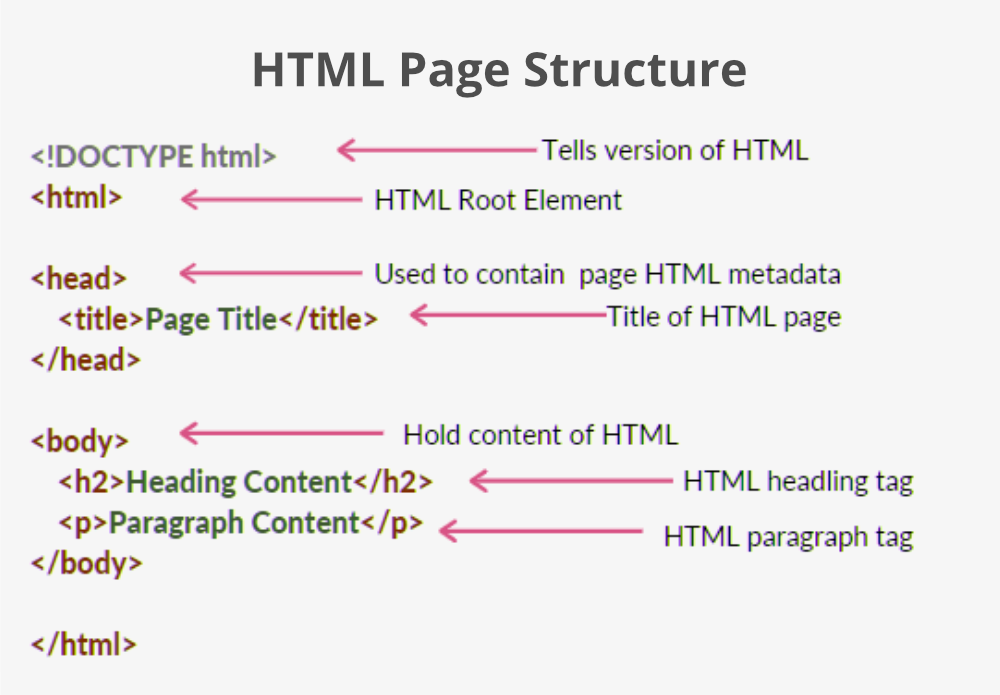

### Getting html code for data

In [38]:
data = response.content

### Create beatuiful soup for scrapping data

In [39]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(data)

### Get news heading and news links

In [40]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/" rel="bookmark" title="First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan">First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/center-redefines-terrorism-includes-actions-threatens-india-economic-security/" rel="bookmark" title="Center redefines terrorism in new criminal code, includes actions that threaten India’s economic security: Report ">Center redefines terrorism in new criminal code, includes actions that threaten India’s economic security: Report </a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/sanjay-raut-sedition-objectionable-ar

In [41]:
headings[0]

<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/" rel="bookmark" title="First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan">First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan</a></h3>

In [42]:
headings[0].text

'First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan'

In [43]:
headings[0].find('a')

<a href="https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/" rel="bookmark" title="First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan">First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan</a>

In [44]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/'

In [45]:
len(headings)

104

### Create a function to get news headings and links

In [46]:
def get_news_headings_links(url):
    import requests
    response = requests.get(url)
    data = response.content
    from bs4 import BeautifulSoup
    bs = BeautifulSoup(data)
    # Get news headings and links
    headings = bs.find_all('h3', class_="entry-title td-module-title")
    title = []
    links = []
    for i in headings:
        h = i.text
        title.append(h)
        l = i.find('a').get('href')
        links.append(l)
    return title, links

In [47]:
url

'https://www.opindia.com/latest-news/?nocache'

In [48]:
titles, links = get_news_headings_links(url)

In [49]:
titles[0:5]

['First-time MLA and four-time state General Secretary Bhajan Lal Sharma: BJP signals organisational importance in choosing new CM for Rajasthan',
 'Center redefines terrorism in new criminal code, includes actions that threaten India’s economic security: Report\xa0',
 'Sanjay Raut booked for writing an objectionable article against PM Modi in ‘Saamna’, defends saying ‘we have democracy’: Details',
 'Another BJP surprise in Rajasthan: Bhajanlal Sharma to be next CM, Diya Kumari and Prem Chand Bairwa to be the Deputy CMs',
 'K Annamalai slams temple management and HR&CE over attack on Sabarimala devotees at Tamil Nadu’s Srirangam temple']

In [50]:
links[0:5]

['https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/',
 'https://www.opindia.com/2023/12/center-redefines-terrorism-includes-actions-threatens-india-economic-security/',
 'https://www.opindia.com/2023/12/sanjay-raut-sedition-objectionable-article-pm-modi-saamna-defends-democracy/',
 'https://www.opindia.com/2023/12/rajasthan-bhajanlal-sharma-next-rajasthan-cm-diya-kumari-prem-chand-bairwa-deputy-cm/',
 'https://www.opindia.com/2023/12/k-annamalai-slams-temple-management-and-hrce-over-attack-on-sabarimala-devotees-at-srirangam-temple/']

In [51]:
url2 = links[0]
url2

'https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/'

In [52]:
response2 = requests.get(url2)
response2

<Response [200]>

In [53]:
data2 = response2.content
bs2 = BeautifulSoup(data2)

In [54]:
date = bs2.find('time', class_="entry-date updated td-module-date")
date

<time class="entry-date updated td-module-date" datetime="2023-12-12T18:59:34+05:30">12 December, 2023 </time>

In [55]:
date.text

'12 December, 2023 '

In [56]:
content_tags = bs2.find_all('p')
content_tags

[<p>He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he defeated Pushpendra Bhardwaj of Congress by 48,081 votes. </p>,
 <p>The Bhartiya Janata Party (BJP), contrary to the media speculations, announced Bhajan Lal Sharma as the CM-designate of Rajasthan. Further, his appointment is seen as a major deviation from the general political trend. Usually, seniority and political growth had been adjudged by the number of times a leader has been elected to the state assembly or Lok Sabha. 56-year-old Bhajan Lal Sharma is a first-time MLA. He completed his MA (politics) from Rajasthan University, Jaipur, in 1993.</p>,
 <p>He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he <a href="https://indianexpress.com/article/india/bhajanlal-sharma-is-new-rajasthan-chief-minister-9065071/" rel="noreferrer noopener" target="_blank">defeated</a> Pushpendra Bhardwaj of

In [57]:
content_tags[0].text

'He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he defeated Pushpendra Bhardwaj of Congress by 48,081 votes. '

In [58]:
article = ""
for i in content_tags:
    article = article + i.text

In [59]:
print(article)

He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he defeated Pushpendra Bhardwaj of Congress by 48,081 votes. The Bhartiya Janata Party (BJP), contrary to the media speculations, announced Bhajan Lal Sharma as the CM-designate of Rajasthan. Further, his appointment is seen as a major deviation from the general political trend. Usually, seniority and political growth had been adjudged by the number of times a leader has been elected to the state assembly or Lok Sabha. 56-year-old Bhajan Lal Sharma is a first-time MLA. He completed his MA (politics) from Rajasthan University, Jaipur, in 1993.He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he defeated Pushpendra Bhardwaj of Congress by 48,081 votes. The BJP had fielded him after denying a ticket to the sitting MLA Ashok Lahoti. However, Sharma, a resident of Bharatpur, is said to have a strong hold

### Getting news article time and article for a specific link

In [60]:
def get_news_date_article(url2):    
    response2 = requests.get(url2)
    data2 = response2.content
    bs2 = BeautifulSoup(data2)
    # Getting Date
    date_tag = bs2.find('time', class_="entry-date updated td-module-date")
    date = date_tag.text
    # Get article
    content_tags = bs2.find_all('p')
    article = ""
    for i in content_tags:
        article = article + i.text
    return date, article


In [61]:
def get_all_news_dates_articles(links):
    news = []
    dates = []
    for i in links:
        date, article = get_news_date_article(i)
        dates.append(date)
        news.append(article)
    return dates, news

In [62]:
url2

'https://www.opindia.com/2023/12/bjp-rajasthan-general-secretary-bhajan-lal-sharma-cm/'

In [63]:
date, article = get_news_date_article(url2)

In [64]:
date

'12 December, 2023 '

In [65]:
article

"He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he defeated Pushpendra Bhardwaj of Congress by 48,081 votes. The Bhartiya Janata Party (BJP), contrary to the media speculations, announced Bhajan Lal Sharma as the CM-designate of Rajasthan. Further, his appointment is seen as a major deviation from the general political trend. Usually, seniority and political growth had been adjudged by the number of times a leader has been elected to the state assembly or Lok Sabha. 56-year-old Bhajan Lal Sharma is a first-time MLA. He completed his MA (politics) from Rajasthan University, Jaipur, in 1993.He is the elected MLA from Sanganer Assembly constituency. In the recently concluded 2023 Rajasthan assembly elections, he defeated Pushpendra Bhardwaj of Congress by 48,081 votes. The BJP had fielded him after denying a ticket to the sitting MLA Ashok Lahoti.\xa0However, Sharma, a resident of Bharatpur, is said to have a strong 

### Creating a final function to save all news details in a dataframe

In [66]:
def get_news_dataframe(url):
    # Get news headings and links
    headings, links = get_news_headings_links(url)
    # Get the news and dates for each link
    dates, news  = get_all_news_dates_articles(links)
    dct = {'Date':dates, 
           'Heading':headings,
           'Link': links,
           'Article':news}
    # Save above in dataframe
    import pandas as pd
    df = pd.DataFrame(dct)
    return df

In [67]:
url

'https://www.opindia.com/latest-news/?nocache'

In [68]:
df_news = get_news_dataframe(url)

In [69]:
df_news

,Date,Heading,Link,Article
0,"12 December, 2023",First-time MLA and four-time state General Sec...,https://www.opindia.com/2023/12/bjp-rajasthan-...,He is the elected MLA from Sanganer Assembly c...
1,"12 December, 2023",Center redefines terrorism in new criminal cod...,https://www.opindia.com/2023/12/center-redefin...,The definition now includes threats to the eco...
2,"12 December, 2023",Sanjay Raut booked for writing an objectionabl...,https://www.opindia.com/2023/12/sanjay-raut-se...,"The complaint against Raut, the executive edit..."
3,"12 December, 2023",Another BJP surprise in Rajasthan: Bhajanlal S...,https://www.opindia.com/2023/12/rajasthan-bhaj...,"Earlier today, Rajnath Singh and other party o..."
4,"12 December, 2023",K Annamalai slams temple management and HR&CE ...,https://www.opindia.com/2023/12/k-annamalai-sl...,"Notably, the Vaikuntha Ekadasi festival in Sri..."
...,...,...,...,...
99,"11 December, 2023","OpIndia Exclusive: Niyaz, Saddam, Arbaaz and 1...",https://www.opindia.com/2023/12/ahmednagar-16-...,The incident took place on 6th December 2023 w...
100,"11 December, 2023","‘Resounding declaration of hope, progress and ...",https://www.opindia.com/2023/12/pm-modi-praise...,"On 11th December, the Supreme Court of India u..."
101,"11 December, 2023",Chadar of sanitised history over ugly side of ...,https://www.opindia.com/2023/12/nupur-j-sharma...,Since the Islamists have been relentlessly dem...
102,"11 December, 2023","I-T raids on Dhiraj Sahu enter 6th day, 454 cr...",https://www.opindia.com/2023/12/i-t-raids-dhir...,"Odisha media has reported that so far, a total..."


In [71]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     104 non-null    object
 1   Heading  104 non-null    object
 2   Link     104 non-null    object
 3   Article  104 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


### Save all above in news.csv

In [72]:
df_news.to_csv('News.csv', index=False)